# Data Science Project: Planning Stage (Individual)
Name: Annie Wu

Course: DSCI 100 – 2025W1

In [ ]:
library(tidyverse)
library(ggplot2)
library(dplyr)

**(1) Data planning**

**(2) Questions**

**(3) Exploratory Data Analysis and Visualization**

*Load the datasets into R:*

In [ ]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


*The minimum necessary wrangling to turn the data into a tidy format:*

- the [players.csv](players.csv) dataset is already tidy as each variable is its own column, each observation is its own row and each value is atomic. There is no necessary wrangling to perform.
- the [sessions.csv](sessions.csv) dataset is not fully tidy due to date/time column. The start_time and end_time have two pieces of information stored together (date + time), which is not in a tidy format. Furthermore, the original_start_time and original_end_time are in milliseconds, which should be changed to seconds. 

In [ ]:
sessions_tidy <- sessions |>
  separate(
    start_time,
    into   = c("start_date", "start_time"),
    sep    = " ",
    fill   = "right", 
    remove = TRUE
  ) |>
  separate(
    end_time,
    into   = c("end_date", "end_time"),
    sep    = " ",
    fill   = "right",
    remove = TRUE
  ) |>
  mutate(
    original_start_time = original_start_time / 1000,
    original_end_time   = original_end_time / 1000
  )

The code above shows three changes that was made to change [sessions.csv](sessions.csv) into a tidy format. First, the two separate() calls are to split the original start_time and end_time columns into separate start_date/start_clock and end_date/end_clock columns. This ensures that each cell contains only **one piece of information** (either a date or a time), which is consistent with tidy data principles. Second, the mutate() step converts original_start_time and original_end_time from
milliseconds to seconds by dividing by 1000, so that these variables are stored in a more interpretable and consistent numeric scale. Together, these changes make the dataset tidier and easier to work with in later analysis. 

Here is the tidy format of the sessions dataset:

In [ ]:
head(sessions_tidy)

hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1719770000,1719770000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1718670000,1718670000
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1721930000,1721930000
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1721880000,1721880000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1716650000,1716650000
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1719160000,1719160000


*Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format:*

The quantitiative variables in the [players.csv](players.csv) dataset are:

- played_hours (Numeric measure of total hours played)
- Age (Numeric measure of player age)

Here is a table of the two mean values:

In [ ]:
mean_table <- players |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE)
  )

mean_table

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


*Here are a few exploratory visualizations of the data that helps understanding:*

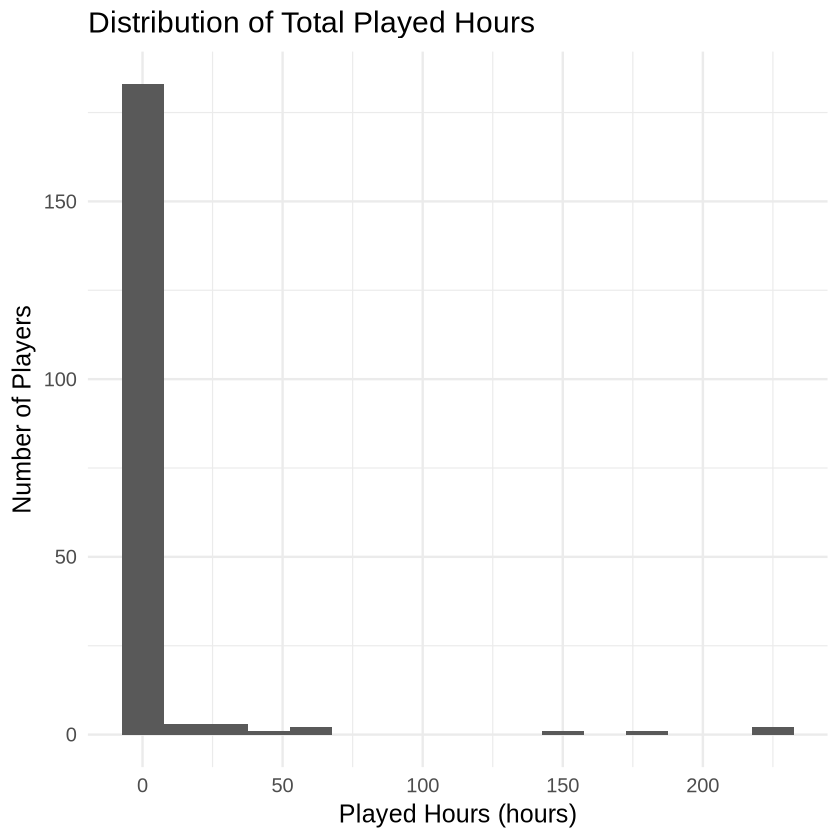

In [ ]:
ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 15) +
  labs(
    title = "Distribution of Total Played Hours",
    x = "Played Hours (hours)",
    y = "Number of Players"
  ) +
  theme_minimal(15)

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


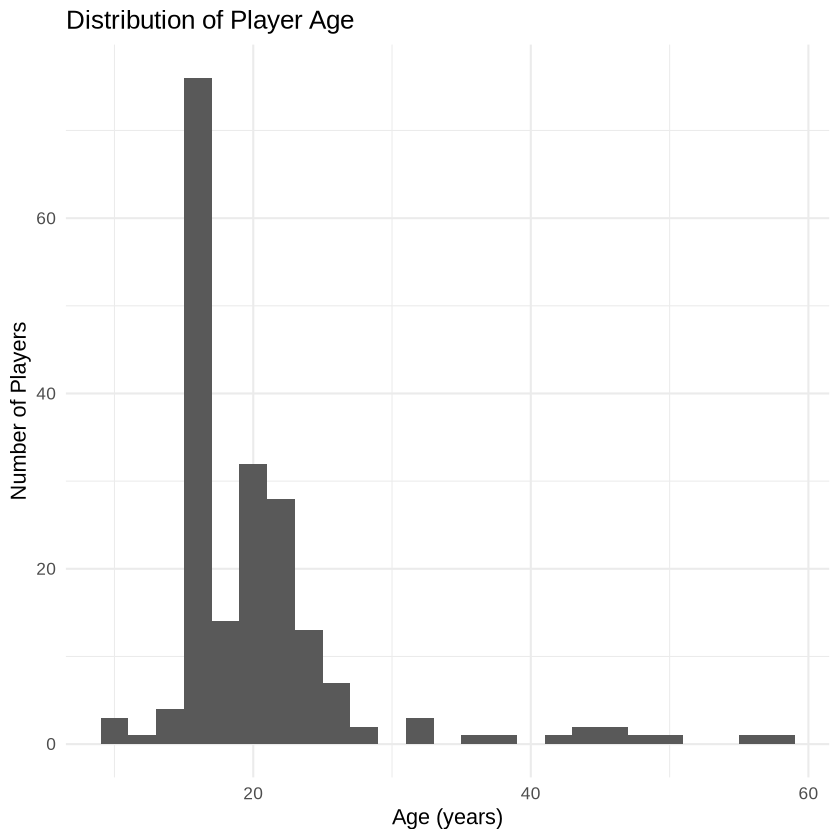

In [ ]:
ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2) +
  labs(
    title = "Distribution of Player Age",
    x = "Age (years)",
    y = "Number of Players"
  ) +
  theme_minimal(base_size = 13)

**(4) Methods and Plan**

**(5) GitHub Repository** 

Click here for the [GitHub repository for the project](https://github.com/awu0521/Dsci-11)